In [1]:
import requests
import json

In [2]:
from PIL import Image
import requests
from io import BytesIO
URL_IMG = "https://nocamels.com/wp-content/uploads/2019/06/yandex-light.jpeg"
response = requests.get(URL_IMG)
img_pil = Image.open(BytesIO(response.content))

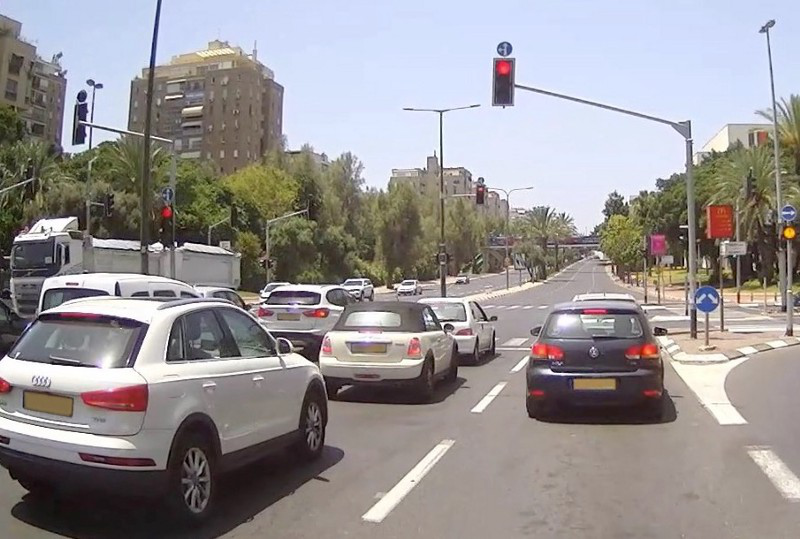

In [3]:
img_pil

In [4]:
img_pil.save('test_img.png')

In [5]:
name_img = 'test_img_2.png'
img_pil.rotate(180).save(name_img)

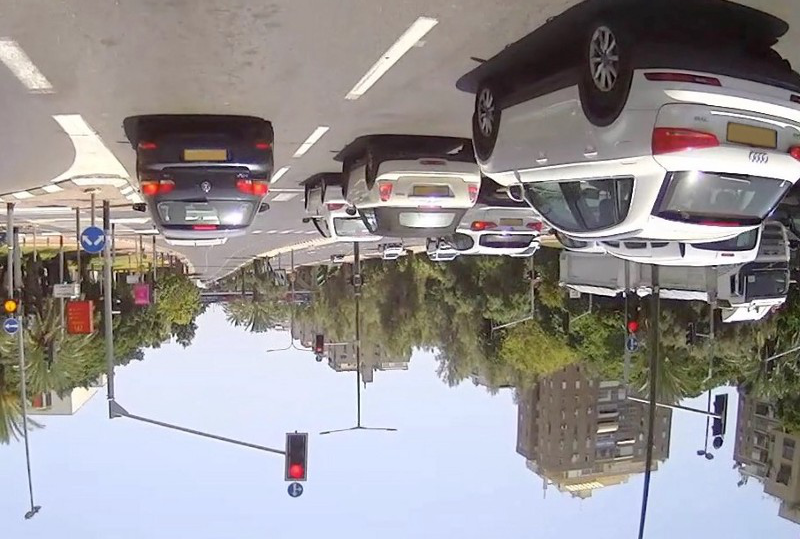

In [6]:
Image.open(name_img)

In [7]:
img_pil=Image.open(name_img)

In [8]:
type(response.content)

bytes

In [14]:
# URL_APP = 'https://derotate.appspot.com'
URL_APP = "http://localhost"
URL_APP = "http://54.210.65.124"


## Call the API with an image file

In [15]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}/img2class/"
  
# data to be sent to api 
files = {'file': open(name_img, 'rb')}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")
r.json()

500
Time elapsed = 3.7035839557647705


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Call the API with the image directly

In [10]:
def image_to_byte_array(image:Image):
  imgByteArr = BytesIO()
  image.save(imgByteArr, format=image.format)
  imgByteArr = imgByteArr.getvalue()
  return imgByteArr

In [11]:
# img_bytes = response.content
img_bytes = image_to_byte_array(img_pil)
img_bytes_io = BytesIO(img_bytes)
type(img_bytes_io)

_io.BytesIO

In [12]:
type(open(name_img, 'rb'))

_io.BufferedReader

In [13]:
files = {'file':img_bytes_io}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)
r.json()

200


{'result': 'rotated180'}

## Test img2img API

In [18]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}/img2img/"

# data to be sent to api 
img_bytes = response.content 
files = {'file': open('test_img_2.png', 'rb')}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")
# r.json()

200
Time elapsed = 5.210994243621826


In [19]:
type(BytesIO(r.content))

_io.BytesIO

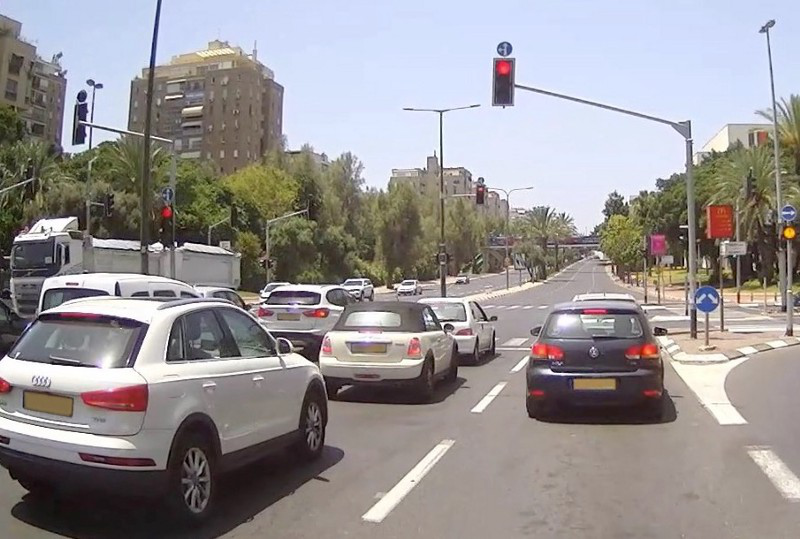

In [20]:
dataBytesIO = BytesIO(r.content)
Image.open(dataBytesIO)